In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [16]:
titanic_df = pd.read_csv("C:/Users/Yousef Hanna/Desktop/github_gomycode/titanic-passengers.csv",sep = ";")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [23]:
titanic_df['Age'].fillna(titanic_df['Age'].mode()[0],inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

In [24]:
t_encode = LabelEncoder()
titanic_df['Survived']= t_encode.fit_transform(titanic_df['Survived'])
titanic_df['Sex']= t_encode.fit_transform(titanic_df['Sex'])
titanic_df['Embarked']= t_encode.fit_transform(titanic_df['Embarked'])

In [27]:
#features extraction
x = titanic_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = titanic_df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

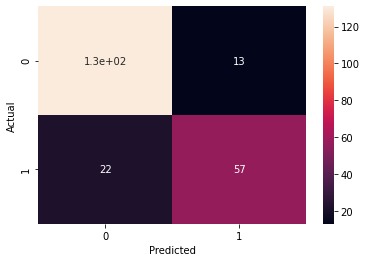

In [35]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       144
           1       0.81      0.72      0.77        79

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [39]:
roc_auc_score(y_test, y_pred)

0.815620604781997

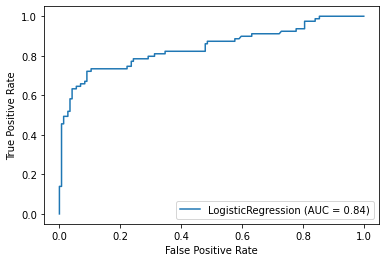

In [41]:
plot_roc_curve(logreg ,x_test, y_test)

based on confusion matrix, sensitivity and specificity are calculated to evaluate the log. reg. based on threshold.
instead of calculating several confusion matrices, ROC graph provide simple way tp summarize all info.

Y axis show TP rate == Sensitivity (TP/Tp+FN)
tells the proportion of  survived samples that were correctly classified

X axis show FP rate, which is 1- Specificity (FP/FP+TN)
tells the porportion of not survived samples that were incorrectly classified

ROC graph summarizes all of the confusion matrices tha each threshold produced, without having to sort through the confusion matrices, we can tell which threshold is better to choose the optimal one.

AUC as it increases the better the categorization model is
